<a href="https://colab.research.google.com/github/RinzCSGO/data-science/blob/main/dieuChinhNhietDo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 5.0 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=07069dd4685faa33b7d5a2b0cd7342923cf9671cbb8de28504f133afb4d4079d
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [2]:
# Cách viết import kiểu khác
import skfuzzy as fz
import numpy as np
from skfuzzy import control as ctrl

N = ctrl.Antecedent([1,2,3,4,5,6,7,8,9,10],"So nguoi")
Tin = ctrl.Antecedent(np.arange(18,31),"Nhiet do trong phong")
Tout = ctrl.Antecedent(np.arange(20,41),"Nhiet do ngoai troi")
L = ctrl.Consequent(np.arange(18,27),"Muc dieu chinh")

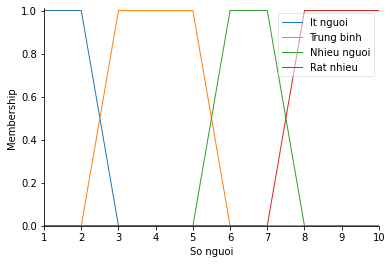

In [3]:
N["It nguoi"] = fz.trapmf( N.universe,[1,1,2,3] )
N["Trung binh"] = fz.trapmf( N.universe,[2,3,5,6] )
N["Nhieu nguoi"] = fz.trapmf( N.universe,[5,6,7,8] )
N["Rat nhieu"] = fz.trapmf( N.universe,[7,8,10,10] )
N.view()

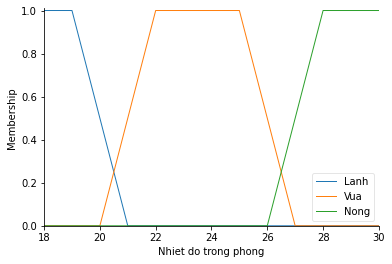

In [4]:
Tin["Lanh"] = fz.trapmf( Tin.universe,[18,18,19,21] )
Tin["Vua"] = fz.trapmf( Tin.universe,[20,22,25,27] )
Tin["Nong"] = fz.trapmf( Tin.universe,[26,28,30,30] )
Tin.view()

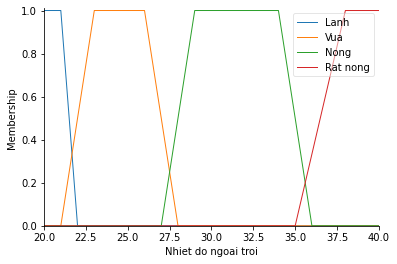

In [5]:
Tout["Lanh"] = fz.trapmf( Tout.universe,[20,20,21,22] )
Tout["Vua"] = fz.trapmf( Tout.universe,[21,23,26,28] )
Tout["Nong"] = fz.trapmf( Tout.universe,[27,29,34,36] )
Tout["Rat nong"] = fz.trapmf( Tout.universe,[35,38,40,40] )
Tout.view()

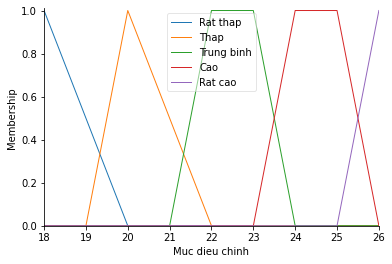

In [7]:
L["Rat thap"] = fz.trimf( L.universe,[18,18,20] )
L["Thap"] = fz.trimf( L.universe,[19,20,22] )
L["Trung binh"] = fz.trapmf( L.universe,[21,22,23,24] )
L["Cao"] = fz.trapmf( L.universe,[23,24,25,26] )
L["Rat cao"] = fz.trapmf( L.universe,[25,26,27,27] )
L.view()

In [10]:
R1_2 = ctrl.Rule( N["It nguoi"] & Tin["Lanh"] & (Tout["Lanh"] | Tout["Vua"]), L["Rat cao"] )
R3_4 = ctrl.Rule( N["It nguoi"] & Tin["Lanh"] & (Tout["Nong"] | Tout["Rat nong"]), L["Cao"] )
R5 = ctrl.Rule( N["It nguoi"] & Tin["Vua"] & Tout["Lanh"], L["Rat cao"] )
R6_7 = ctrl.Rule( N["It nguoi"] & Tin["Vua"] & (Tout["Vua"] | Tout["Nong"]), L["Cao"] )
R8 = ctrl.Rule( N["It nguoi"] & Tin["Vua"] & Tout["Rat nong"], L["Trung binh"] )
R9 = ctrl.Rule( N["It nguoi"] & Tin["Nong"] & Tout["Lanh"], L["Cao"] )
R10_11 = ctrl.Rule( N["It nguoi"] & Tin["Nong"] & (Tout["Vua"] | Tout["Nong"]), L["Trung binh"] )
R12 = ctrl.Rule( N["It nguoi"] & Tin["Nong"] & Tout["Rat nong"], L["Thap"] )

R13_14 = ctrl.Rule( N["Trung binh"] & Tin["Lanh"] & (Tout["Lanh"] | Tout["Vua"]), L["Rat cao"] )
R15 = ctrl.Rule( N["Trung binh"] & Tin["Lanh"] & Tout["Nong"], L["Cao"] )
R16 = ctrl.Rule( N["Trung binh"] & Tin["Lanh"] & Tout["Rat nong"], L["Trung binh"] )
R17 = ctrl.Rule( N["Trung binh"] & Tin["Vua"] & Tout["Lanh"], L["Cao"] )
R18 = ctrl.Rule( N["Trung binh"] & Tin["Vua"] & Tout["Vua"], L["Trung binh"] )
R19_20 = ctrl.Rule( N["Trung binh"] & Tin["Vua"] & (Tout["Nong"] | Tout["Rat nong"]), L["Thap"] )
R21 = ctrl.Rule( N["Trung binh"] & Tin["Nong"] & Tout["Lanh"], L["Cao"] )
R22 = ctrl.Rule( N["Trung binh"] & Tin["Nong"] & Tout["Vua"], L["Trung binh"] )
R23_24 = ctrl.Rule( N["Trung binh"] & Tin["Nong"] & (Tout["Nong"] | Tout["Rat nong"]), L["Thap"] )

R25 = ctrl.Rule( N["Nhieu nguoi"] & Tin["Lanh"] & Tout["Lanh"], L["Cao"] )
R26_27 = ctrl.Rule( N["Nhieu nguoi"] & Tin["Lanh"] & (Tout["Vua"] | Tout["Nong"] ), L["Trung binh"])
R28 = ctrl.Rule( N["Nhieu nguoi"] & Tin["Lanh"] & Tout["Rat nong"], L["Thap"] )
R29_30 = ctrl.Rule( N["Nhieu nguoi"] & Tin["Vua"] & (Tout["Lanh"] | Tout["Vua"] ), L["Trung binh"] )
R31_32 = ctrl.Rule( N["Nhieu nguoi"] & Tin["Vua"] & (Tout["Nong"] | Tout["Rat nong"]), L["Thap"] )
R33 = ctrl.Rule( N["Nhieu nguoi"] & Tin["Nong"] & Tout["Lanh"], L["Trung binh"] )
R34_35 = ctrl.Rule( N["Nhieu nguoi"] & Tin["Nong"] & (Tout["Vua"] | Tout["Nong"]), L["Thap"] )
R36 = ctrl.Rule( N["Nhieu nguoi"] & Tin["Nong"] & Tout["Rat nong"], L["Rat thap"] )

R37_38 = ctrl.Rule( N["Rat nhieu"] & Tin["Lanh"] & (Tout["Lanh"] | Tout["Vua"]), L["Trung binh"])
R39_40 = ctrl.Rule( N["Rat nhieu"] & Tin["Lanh"] & (Tout["Nong"] | Tout["Rat nong"]), L["Thap"] )
R41 = ctrl.Rule( N["Rat nhieu"] & Tin["Vua"] & Tout["Lanh"], L["Trung binh"] )
R42_43 = ctrl.Rule( N["Rat nhieu"] & Tin["Vua"] & (Tout["Vua"] | Tout["Nong"]), L["Thap"] )
R44 = ctrl.Rule( N["Rat nhieu"] & Tin["Vua"] & Tout["Rat nong"], L["Rat thap"] )
R45_46 = ctrl.Rule( N["Rat nhieu"] & Tin["Nong"] & (Tout["Lanh"] | Tout["Vua"]), L["Thap"] )
R47_48 = ctrl.Rule( N["Rat nhieu"] & Tin["Nong"] & (Tout["Nong"] | Tout["Rat nong"]), L["Rat thap"])

In [11]:
rules = [R1_2,R3_4,R5,R6_7,R8,R9,R10_11,R12,R13_14,R15,R16,R17,R18,R19_20,R21,R22,R23_24,
R25,R26_27,R28,R29_30,R31_32,R33,R34_35,R36,R37_38,R39_40,R41,R42_43,R44,R45_46,R47_48]

system = ctrl.ControlSystemSimulation( ctrl.ControlSystem(rules) )

In [14]:
iN = int( input("Số người: ") )
iTin = float( input("Nhiệt độ trong phòng: ") )
iTout = float( input("Nhiệt độ bên ngoài: ") )

system.input["So nguoi"] = iN
system.input["Nhiet do trong phong"] = iTin
system.input["Nhiet do ngoai troi"] = iTout

Số người: 3
Nhiệt độ trong phòng: 27
Nhiệt độ bên ngoài: 30


Với 3 người ở trong phòng, nhiệt độ trong phòng là 27.0 và ngoài trời là 30.0 thì mức điều chỉnh là 20


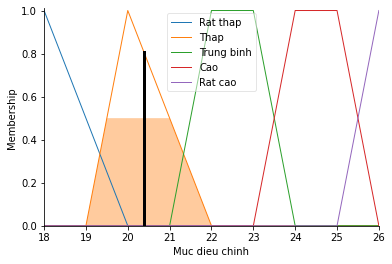

In [15]:
system.compute()
oL = system.output["Muc dieu chinh"]
L.view( system )

print( "Với %d người ở trong phòng, nhiệt độ trong phòng là %.1f và ngoài trời là %.1f thì mức điều chỉnh là %d" %(iN,iTin,iTout,oL))